In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
np.random.seed(7)

In [2]:
def perf_measure(y_actual, y_pred):
    global SENSITIVITY
    global SPECIFICITY
    global PRECISION
    global NEGATIVE_PREDICTIVE_VALUE
    global FALSE_NEGATIVE_RATE
    global FALSE_POSITIVE_RATE
    global FALSE_DISCOVERY_RATE
    global FALSE_OMISSION_RATE
    global ACCURACY
    global F1_SCORE
    global Iteration
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(len(y_pred)): 
        #print('actual',y_actual[i])
        #print('predicted', y_pred[i])
        if y_actual[i]==y_pred[i]==1.:
            #print('TP')
            TP += 1
        if y_pred[i]==1. and y_actual[i]!=y_pred[i]:
            #print('FP')
            FP += 1
        if y_actual[i]==y_pred[i]==0.:
            #print('TN')
            TN += 1
        if y_pred[i]==0. and y_actual[i]!=y_pred[i]:
            FN += 1
            #print("FN")
    
    #SENSITIVITY += TP/(TP + FN)
    #SPECIFICITY += TN/(TN + FP)
    #PRECISION += TP/(TP + FP)
    #NEGATIVE_PREDICTIVE_VALUE += TN/(TN + FN)
    #FALSE_NEGATIVE_RATE += FN/(FN + TP)
    #FALSE_POSITIVE_RATE += FP/(FP + TN)
    #FALSE_DISCOVERY_RATE += FP/(FP + TP)
    #FALSE_OMISSION_RATE += FN/(FN + TN)
    #ACCURACY += (TP + TN)/(TP + TN + FP + FN)
    #F1_SCORE += 2*TP/(2*TP + FP + FN)
    #Iteration = Iteration + 1
    return (TP, TN, FP, FN)

In [3]:
#load data
data = pd.read_csv('../input/wdbc.csv')
print(data.head())
labels = data['class'].values
del data['class']
features = data.values

#look at data
print('class label =' ,labels[0])
print(features[0])

#split data
#train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, random_state=7)

   area error  compactness error  ...    worst texture  class
0    0.006399            0.04904  ...            17.33      0
1    0.005225            0.01308  ...            23.41      0
2    0.006150            0.04006  ...            25.53      0
3    0.009110            0.07458  ...            26.50      0
4    0.011490            0.02461  ...            16.67      0

[5 rows x 31 columns]
class label = 0
[6.399e-03 4.904e-02 1.587e-02 5.373e-02 6.193e-03 1.001e+03 3.001e-01
 2.419e-01 1.471e-01 1.095e+00 1.228e+02 1.799e+01 1.184e-01 7.871e-02
 1.038e+01 1.534e+02 9.053e-01 4.904e-02 3.003e-02 8.589e+00 2.019e+03
 6.656e-01 2.654e-01 7.119e-01 1.189e-01 1.846e+02 2.538e+01 1.622e-01
 4.601e-01 1.733e+01]


<class 'pandas.core.frame.DataFrame'>
30


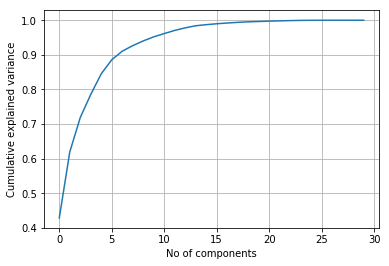

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print(type(data))

scaler = StandardScaler()
features = scaler.fit_transform(data.values)

dataset = pd.DataFrame({'mean radius': features[:, 0], 'mean texture': features[:, 1], 'mean perimeter': features[:, 2], \
                        'mean area': features[:, 3], 'mean smoothness': features[:, 4], 'mean compactness': features[:, 5], \
                        'mean compactness': features[:, 6], 'mean concavity': features[:, 7], 'mean concave points': features[:, 8], \
                        'mean symmetry': features[:, 9], 'mean fractal dimension': features[:, 10], 'radius error': features[:, 11], \
                        'texture error': features[:, 12], 'perimeter error': features[:, 13], 'area error': features[:, 14], \
                       'smoothness error': features[:, 15], 'compactness error': features[:, 15], 'concavity error': features[:, 16],\
                       'concave points error': features[:, 17], 'symmetry error': features[:, 18], 'fractal dimension error': features[:, 19], \
                       'worst radius': features[:, 20], 'worst texture': features[:, 21], 'worst perimeter': features[:, 22],\
                       'worst area': features[:, 23], 'worst smoothness': features[:, 24], 'worst compactness': features[:, 25],\
                       'worst concavity': features[:, 26], 'worst concave points': features[:, 27], 'worst symmetry': features[:, 28], 'worst fractal dimension': features[:, 29]})
dim = 20
print(len(features[0]))
sklearn_pca = PCA(n_components=dim)
#sklearn_lda = LinearDiscriminantAnalysis(n_components=18)

reduced_data = sklearn_pca.fit_transform(dataset.values)
#reduced_data2 = sklearn_lda.fit(dataset.values, labels).transform(dataset.values)
pca = PCA().fit(dataset.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('No of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [5]:
print(len(reduced_data))

569


Using TensorFlow backend.


[ 9.08998821  1.08009782 -0.98374291  4.02782612 -0.61801217  1.43675724
  2.0454996  -0.41352278 -0.44613455 -0.78968544  0.04433841  0.79013289
 -0.25809244 -0.70540606 -0.53702146  0.50584715 -0.36684015  0.29365964
 -0.29680609 -0.05242924]
114/114 [==============================] - 0s 69us/step
acc: 99.12%
99.12% (+/- 0.00%)
TP:  74
TN:  39
FP:  1
FN:  0


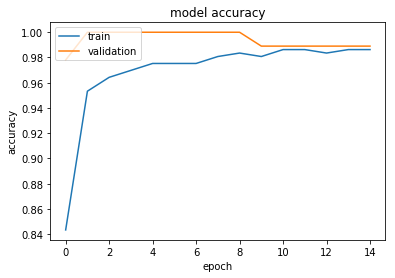

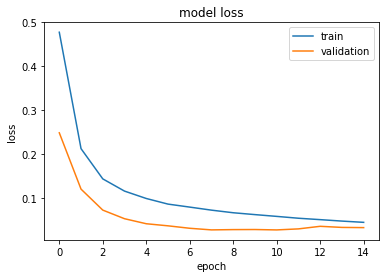

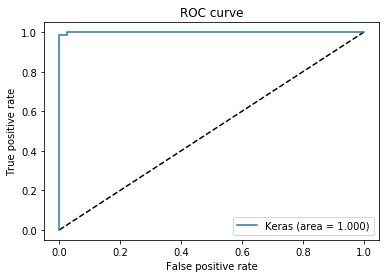

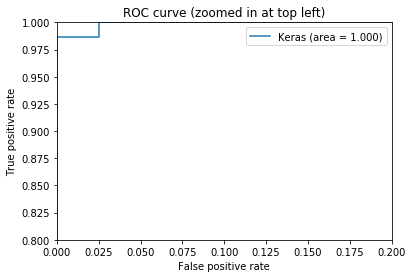

Average SENSITIVITY: 1.0
Average SPECIFICITY: 0.975
Average PRECISION: 0.9866666666666667
Average NEGATIVE_PREDICTIVE_VALUE: 1.0
Average FALSE_NEGATIVE_RATE: 0.0
Average FALSE_POSITIVE_RATE: 0.025
Average FALSE_DISCOVERY_RATE: 0.013333333333333334
Average FALSE_OMISSION_RATE: 0.0
Average ACCURACY: 0.9912280701754386
Average F1_SCORE: 0.9932885906040269


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy
import numpy as np
from sklearn.model_selection import StratifiedKFold

train, test, train_labels, test_labels = train_test_split(reduced_data, labels, test_size=0.20, random_state=7)

TP = 0
TN = 0
FP = 0
FN = 0

print(reduced_data[0])
seed = 7
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
i = 0
#for train, test in kfold.split(reduced_data, labels):
# create model
model = Sequential()
model.add(Dense(512, input_dim=dim,activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(train, train_labels, epochs=15, batch_size=20, validation_split=0.2, verbose=0)


f = plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
# summarize history for loss
g = plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.show()


# evaluate the model
scores = model.evaluate(test, test_labels)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
y = model.predict(test)
#print('Output',y[0])
#break
y_new = np.rint(y)

(tp, tn, fp, fn) = perf_measure(test_labels, y_new)
TP = TP + tp
FP = FP + fp
FN = FN + fn
TN = TN + tn

cvscores.append(scores[1]*100)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
i = i + 1



y_pred_keras = model.predict(test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

# Zoom in view of the upper left corner.
plt.figure(4)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')


#break
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("TP: ",TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

plt.show()

SENSITIVITY = TP/(TP + FN)
SPECIFICITY = TN/(TN + FP)
PRECISION = TP/(TP + FP)
NEGATIVE_PREDICTIVE_VALUE = TN/(TN + FN)
FALSE_NEGATIVE_RATE = FN/(FN + TP)
FALSE_POSITIVE_RATE = FP/(FP + TN)
FALSE_DISCOVERY_RATE = FP/(FP + TP)
FALSE_OMISSION_RATE = FN/(FN + TN)
ACCURACY = (TP + TN)/(TP + TN + FP + FN)
F1_SCORE = 2*TP/(2*TP + FP + FN)
Iteration = 1
print('Average SENSITIVITY: '+str(SENSITIVITY/Iteration))
print('Average SPECIFICITY: '+str(SPECIFICITY/Iteration))
print('Average PRECISION: '+str(PRECISION/Iteration))
print('Average NEGATIVE_PREDICTIVE_VALUE: '+str(NEGATIVE_PREDICTIVE_VALUE/Iteration))
print('Average FALSE_NEGATIVE_RATE: '+str(FALSE_NEGATIVE_RATE/Iteration))
print('Average FALSE_POSITIVE_RATE: '+str(FALSE_POSITIVE_RATE/Iteration))
print('Average FALSE_DISCOVERY_RATE: '+str(FALSE_DISCOVERY_RATE/Iteration))
print('Average FALSE_OMISSION_RATE: '+str(FALSE_OMISSION_RATE/Iteration))
print('Average ACCURACY: '+str(ACCURACY/Iteration))
print('Average F1_SCORE: '+str(F1_SCORE/Iteration))

CNN

[ 9.08998821  1.08009782 -0.98374291  4.02782612 -0.61801217  1.43675724
  2.0454996  -0.41352278 -0.44613455 -0.78968544  0.04433841  0.79013289
 -0.25809244 -0.70540606 -0.53702146  0.50584715 -0.36684015  0.29365964
 -0.29680609 -0.05242924]
114/114 [==============================] - 0s 105us/step

acc: 96.49%
96.49% (+/- 0.00%)
TP:  72
TN:  38
FP:  2
FN:  2


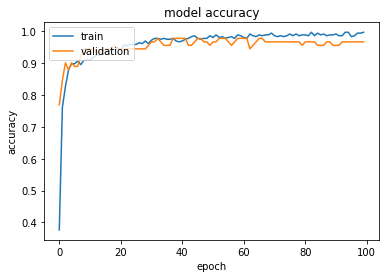

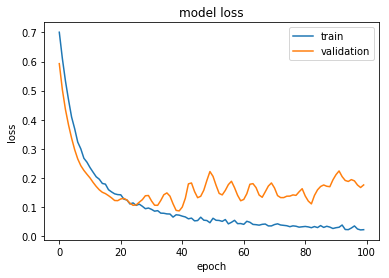

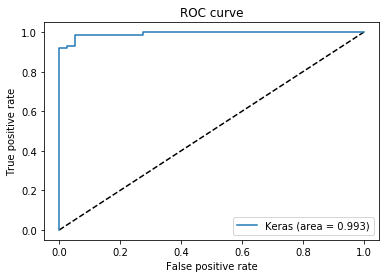

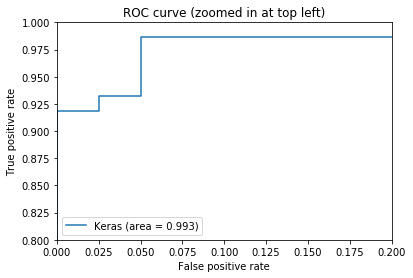

Average SENSITIVITY: 0.972972972972973
Average SPECIFICITY: 0.95
Average PRECISION: 0.972972972972973
Average NEGATIVE_PREDICTIVE_VALUE: 0.95
Average FALSE_NEGATIVE_RATE: 0.02702702702702703
Average FALSE_POSITIVE_RATE: 0.05
Average FALSE_DISCOVERY_RATE: 0.02702702702702703
Average FALSE_OMISSION_RATE: 0.05
Average ACCURACY: 0.9649122807017544
Average F1_SCORE: 0.972972972972973


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

train, test, train_labels, test_labels = train_test_split(reduced_data, labels, test_size=0.20, random_state=7)

TP = 0
TN = 0
FP = 0
FN = 0

print(reduced_data[0])
seed = 7
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
i = 0
#for train, test in kfold.split(reduced_data, labels):
trainX = np.expand_dims(train, axis=2)
testX = np.expand_dims(test, axis=2)

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(dim,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nb_epoch = 3
history = model.fit(trainX, train_labels, epochs=100, validation_split=0.2, batch_size=512, verbose=0)


f = plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.show()
# summarize history for loss
g = plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.show()


# evaluate the model
scores = model.evaluate(testX, test_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

pred_y = model.predict(testX)
y_new = np.rint(pred_y)
(tp, tn, fp, fn) = perf_measure(test_labels, y_new)
TP = TP + tp
FP = FP + fp
FN = FN + fn
TN = TN + tn

#print(y_new)

cvscores.append(scores[1]*100)
i = i + 1

y_pred_keras = model.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

# Zoom in view of the upper left corner.
plt.figure(4)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')

#break
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("TP: ",TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

plt.show()

SENSITIVITY = TP/(TP + FN)
SPECIFICITY = TN/(TN + FP)
PRECISION = TP/(TP + FP)
NEGATIVE_PREDICTIVE_VALUE = TN/(TN + FN)
FALSE_NEGATIVE_RATE = FN/(FN + TP)
FALSE_POSITIVE_RATE = FP/(FP + TN)
FALSE_DISCOVERY_RATE = FP/(FP + TP)
FALSE_OMISSION_RATE = FN/(FN + TN)
ACCURACY = (TP + TN)/(TP + TN + FP + FN)
F1_SCORE = 2*TP/(2*TP + FP + FN)
Iteration = 1
print('Average SENSITIVITY: '+str(SENSITIVITY/Iteration))
print('Average SPECIFICITY: '+str(SPECIFICITY/Iteration))
print('Average PRECISION: '+str(PRECISION/Iteration))
print('Average NEGATIVE_PREDICTIVE_VALUE: '+str(NEGATIVE_PREDICTIVE_VALUE/Iteration))
print('Average FALSE_NEGATIVE_RATE: '+str(FALSE_NEGATIVE_RATE/Iteration))
print('Average FALSE_POSITIVE_RATE: '+str(FALSE_POSITIVE_RATE/Iteration))
print('Average FALSE_DISCOVERY_RATE: '+str(FALSE_DISCOVERY_RATE/Iteration))
print('Average FALSE_OMISSION_RATE: '+str(FALSE_OMISSION_RATE/Iteration))
print('Average ACCURACY: '+str(ACCURACY/Iteration))
print('Average F1_SCORE: '+str(F1_SCORE/Iteration))